<img src="images/MLR.jpg">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X1=np.random.normal(0,1,100)
X2=np.random.uniform(0,1,100)

Y=np.random.normal(0,2,100)

X1.shape, X2.shape, Y.shape

((100,), (100,), (100,))

In [3]:
df=pd.DataFrame(np.vstack((X1,X2,Y)).transpose(), columns=['X1','X2','Y'])
df.head()

,X1,X2,Y
0,1.515785,0.413879,0.370236
1,0.809684,0.150516,0.021339
2,-2.281017,0.400798,2.474480
3,-0.997698,0.582372,-1.189204
4,-1.835274,0.764517,0.495469


In [4]:
df['X0']=1
X=df[['X0','X1','X2']]

X=X.values
Y=df.Y.values

X.shape, Y.shape

((100, 3), (100,))

In [5]:
def gradient(X,Y,phi):
    return (np.transpose(X)@X@phi-np.transpose(X)@Y)/len(X)

def get_loss(X,Y,phi):
    return (np.transpose((Y-X@phi))@(Y-X@phi))/(2*len(X))

def linear_regression(X,Y,alpha,n_iterations):
    
    COSTS=[]
    PHI=[]
    phi=np.random.normal(0,1,3)
    for n_iter in range(n_iterations):
        dphi=gradient(X,Y,phi)
        
        phi=phi-alpha*dphi
        
        cost=get_loss(X,Y,phi)
        COSTS.append(cost)
        PHI.append(phi)
        
    return PHI, COSTS
    
alpha=0.05
n_iterations=100
PHI, COSTS=linear_regression(X,Y,alpha,n_iterations)

PHI[-1], COSTS[-1]

(array([-0.23314419,  0.12946201,  0.60723876]), 1.8048915209530199)

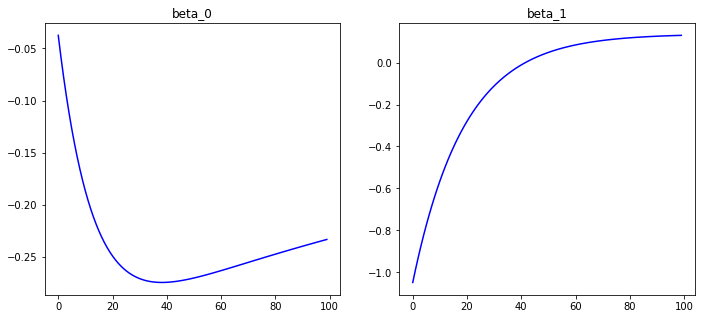

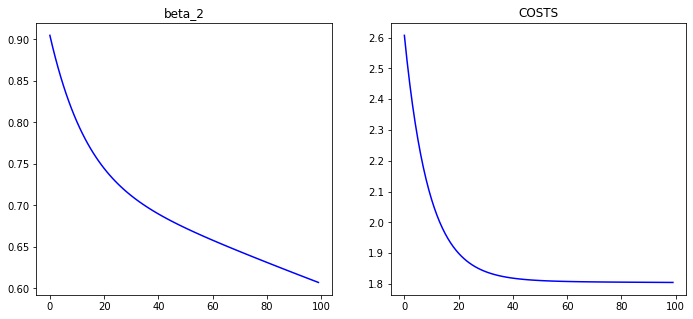

In [6]:
fig=plt.figure(figsize=(18,5))

plt.subplot(131)
plt.title('beta_0')
plt.plot(np.array(PHI)[:,0],c='b')

plt.subplot(132)
plt.title('beta_1')
plt.plot(np.array(PHI)[:,1],c='b')
plt.show()

fig=plt.figure(figsize=(18,5))

plt.subplot(131)
plt.title('beta_2')
plt.plot(np.array(PHI)[:,2],c='b')

plt.subplot(132)
plt.title('COSTS')
plt.plot(COSTS,c='b')
plt.show()